## 実習の事前準備

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

/Users/MisayoMacBookPro/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# CSVファイルからデータを読み込む
dataset_base = pd.read_csv("./baseball_salary_preprocessed.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [3]:
# 列の抜き出し
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

# 列名をリネームする
dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', \
    '年数': 'years_exp', '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})
dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


## 線形回帰モデルの概要

<Axes: xlabel='points', ylabel='salary'>

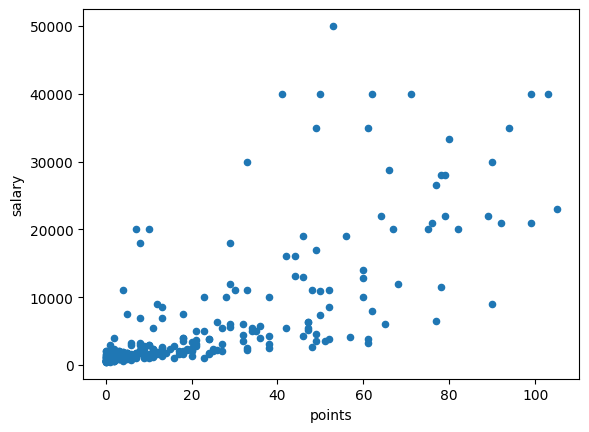

In [4]:
# 打点と推定年俸の散布図
dataset.plot(kind='scatter', x='points', y='salary')

## 線形回帰モデルを作ってみよう

### 1変数の線形回帰モデル

In [5]:
# 必要なライブラリの追加読み込み
#train_test_split：ホールドアウト法によるデータの分割
#LinearRegression：線形回帰モデル
#mean_squared_error：モデルの性能評価用

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# 目的変数（Y）：推定年俸、説明変数（X）：打点
# 目的変数をY、説明変数をX。機械学習のモデルのプログラムはnumpy配列を前提としていることが多いため、ここでnumpy配列に変換しておく。
Y = np.array(dataset['salary'])
X = np.array(dataset[['points']])

#[['points']] のように [] が二重になっているのは、列名を [] のようなリスト形式で指定すると、二次元配列としてXを作成できるためです。

In [7]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (241,) , X= (241, 1)


In [8]:
# XとYを機械学習用データ（train）とテストデータ（test）に7:3に分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Trainをさらに学習データ（train）と検証データ（valid）に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 1)
Y_valid= (51,) , X_valid= (51, 1)
Y_test= (73,) , X_test= (73, 1)


In [10]:
# 線形回帰モデルの指定
linear_model = LinearRegression()

# fit()で学習を実施する
linear_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
# predict()で予測を実施する
Y_pred = linear_model.predict(X_valid)

In [12]:
# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

[1140 5400 5700 1650 3100]
[ 470.34255761 8918.81501551 9415.78398362 2955.18739817 5688.51672278]


In [13]:
# MSE（平均二乗誤差）を算出
linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(1変数の線形回帰モデル):', linear_model_mse)

#MSEは値が 0 に近いほど、モデルの予測精度が高いことを示す（Yの値の規模感と比較して大きいか小さいかを評価）
#√66,838,239（ルート66,838,239）　= 大体8,175なので、Salaryの最大値50,000と比較するとまずまずの精度と言える

MSE(1変数の線形回帰モデル): 66838239.728258096


In [14]:
#一連の手順でどのようなモデルが作成されたか確認してみましょう。今回の線形回帰モデルは以下のような数式でした。
#fθ(x) = θ0 + θ1x
#パラメータは以下のようにして取得できます。θ0は p0 で表記し、またθ1は p1 と表記しています。 coef_[0] となっているのは、説明変数が複数の場合に係数も複数になるためです。

#つまり、モデルは　　　　y = p0 + p1 * x　　で表現されるということ。 

# interceptは切片という意味
p0 = linear_model.intercept_

# coefは係数という意味
p1 = linear_model.coef_[0]

print("p0:", p0, ", p1:", p1)

#つまり、モデルは　　　　y = 470.34255760735687 + （248.48448405602477 * x　)　で表現されるということ。 


p0: 470.34255760735687 , p1: 248.48448405602477


最後に、「パラメータを使った一次関数」、「線形回帰モデルによる予測値」、「実際の値」を重ねたグラフを作成してみましょう。

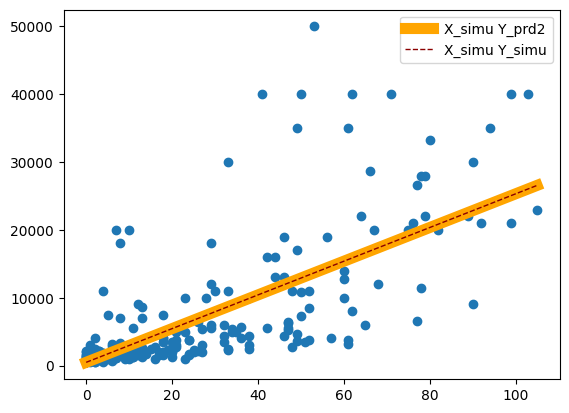

In [15]:
# パラメータを使った1次関数
def calc(x):
    return p0 + p1 * x

# 打点（X）の最小値～最大値の範囲で値を100個作成してリストに格納する
# (numpy.linspaceは、指定した開始値から終了値までの範囲を、指定した個数で等分割する)
X_simu = np.linspace(X.min(), X.max(), 100)

# パラメータを使った1次関数による値
Y_simu = calc(X_simu)

# 線形回帰モデルによる予測値
Y_prd2 = linear_model.predict(X_simu.reshape(-1,1))

# １次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd2, color='orange', linewidth=8, label="X_simu Y_prd2")
plt.plot(X_simu, Y_simu, color='darkred', linewidth=1, linestyle='dashed',label="X_simu Y_simu")
plt.scatter(X, Y)
plt.legend()


### 1変数の線形回帰モデル（対数版）

次に説明変数を加工して、モデルの性能が上がるか試してみましょう。

年収や価格などの「金額」については、対数で表したほうがモデルにフィットしやすい場合があります。たとえば「年俸2000万円から5000万円へのアップ」と「年俸2億円から5億円へのアップ」は、上がった金額（金額の差）で見れば「3000万円」と「3億円」で全然違いますが、上昇率（金額の比）で見ればどちらも2.5倍のアップです。

このような「上昇率（金額の比）」で見る場合、対数を使います。「比率」が対数によって「差」へ変換されるため、モデルの性能が上がる可能性はあります。


そこで、今までのように「金額の差」が反映されるようにプロットするのではなく「金額の比」が反映されるように対数でプロットしてみます。10を底とする対数はnumpyの log10 関数を使用します。

In [17]:
# 推定年俸の対数
Y_log = np.log10(Y)

# 推定年俸と対数との比較
print(Y[:5])
print(Y_log[:5])

[21000 19000 14000 11500 11000]
[4.32221929 4.2787536  4.14612804 4.06069784 4.04139269]


データセットの分割、モデルの作成～予測までは先ほどと同様です。Y_logを使うことに注意しましょう。対数を取ると対応は非線形になってしまいますが、モデルは引き続き LinearRegression を使用できます。

In [18]:
# データセットの分割。Y_logを使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
log_model = LinearRegression()
log_model.fit(X_train, Y_train)
Y_pred = log_model.predict(X_valid)

In [19]:
# 対数から金額に戻す
Y_valid_org = np.power(10, Y_valid)
Y_pred_org = np.power(10, Y_pred)

# MSEを算出
log_model_mse = mean_squared_error(Y_valid_org, Y_pred_org)
print('MSE(1変数の線形回帰モデル～対数版):', log_model_mse)

MSE(1変数の線形回帰モデル～対数版): 76734989.36897749


先ほどのモデルのMSEが（環境によって異なりますが）「66838239.72825806」でしたからモデルの性能は悪くなってしまいました。先ほどのモデルとグラフにして比較してみましょう。

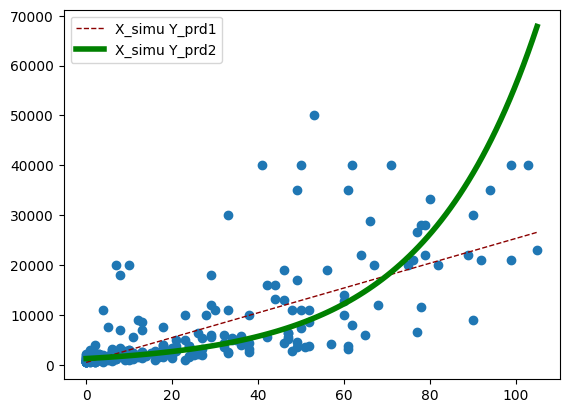

In [20]:
# 打点（X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1,1))

# 線形回帰モデル（対数版）による予測値
Y_prd2 = log_model.predict(X_simu.reshape(-1,1))
Y_prd2 = np.power(10, Y_prd2)

# １次関数：赤い点線、予測値：緑、実際の値：青い散布図
plt.plot(X_simu, Y_prd1, color='darkred', linewidth=1, linestyle='dashed',label = "X_simu Y_prd1")
plt.plot(X_simu, Y_prd2, color='green', linewidth=4, linestyle='solid', label = "X_simu Y_prd2")
plt.scatter(X, Y)
plt.legend()

### 多項式モデル

これまではy = ax + bの一次関数だったため、パラメータとして指定できる条件が限られていた。
このモデルでは数式の 次元 を増やすことで学習性能を上げられないか試してみましょう。（このとき、同じ説明変数の乗数を増やすことで次元を増やす）

二次関数以上の式を使ったモデルを 多項式モデル と呼びます。

数式で表すと以下のようになります。

y = a + bx + cx2 + dx3 .... + nxn+1 = 
    
    n
    Σ     θixi
    i = 0


パラメータの数が増えても、最適なパラメータは勾配降下法で求められる。次数（次元数）は自分で適宜決めてかまいません。ただし次数が上がるとパラメータの数も増えるため、学習データの特徴を過度に学習してしまう「過学習」の状態へなりやすいことに注意が必要です。

今回は5次元の多項式モデルを作成してみます。打点の2～5乗を新たな説明変数として追加します。流れとしては、X を1次元配列に変換したものを用意し、それを2〜5乗したものをそれぞれ別の列として追加する（5列の配列を作成する）、というイメージです。また、モデルは引き続き LinearRegression を使用できます。

In [21]:
# 以下の操作用に1次元配列に変換する
X2 = X.reshape(-1)

# pointsの2～5乗を新たな説明変数として追加
# np.stack()はndarrayを連結する関数
# axis:結合する次元を指定。1は列
X2 = np.stack([X2, X2**2, X2**3, X2**4, X2**5], axis=1)

# 形状を確認
print("Y=", Y.shape, ", X2=", X2.shape)

Y= (241,) , X2= (241, 5)


In [37]:
Y

array([21000, 19000, 14000, 11500, 11000,  9000,  9000,  6500,  5000,
        4600,  3300,  2200,  2200,  2000,  1600,  1600,  1500,   850,
         800,   650,   630,   600, 40000, 40000, 22000,  7500,  5000,
        4300,  3800,  3800,  2500,  2500,  2000,  2000,  1800,  1700,
        1600,  1600,  1600,  1000,  1000,   850,   720,   550, 35000,
       23000, 12800,  8500,  8000,  7300,  5500,  3800,  3000,  2300,
        2200,  2100,  1900,  1570,  1140,   700,   540,   540, 35000,
       30000, 26600, 21000, 19000,  5400,  5200,  3200,  2900,  2900,
        2500,  2400,  2400,  2000,  1800,  1700,  1300,  1200,   960,
       18000, 17000, 12000,  7000,  5500,  4000,  3600,  3000,  2600,
        2100,  2000,  2000,  1650,  1600,  1500,  1300,  1200,  1200,
        1000,   980,   900,   810,   700,   650,   650, 33300, 28000,
       11000, 10000,  6000,  6000,  5400,  2300,  2300,  1700,  1700,
        1600,  1560,  1500,  1300,  1150,  1050,  1000,   950,   900,
         700, 40000,

In [34]:
X2

array([[        92,       8464,     778688,   71639296, 6590815232],
       [        56,       3136,     175616,    9834496,  550731776],
       [        60,       3600,     216000,   12960000,  777600000],
       ...,
       [         2,          4,          8,         16,         32],
       [         0,          0,          0,          0,          0],
       [         0,          0,          0,          0,          0]])

In [22]:
# データセットの分割。X2を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
linear_model2 = LinearRegression()
linear_model2.fit(X_train, Y_train)
Y_pred = linear_model2.predict(X_valid)

# MSEを算出
liner_model2_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(多項式モデル):', liner_model2_mse)

MSE(多項式モデル): 66191889.01694093


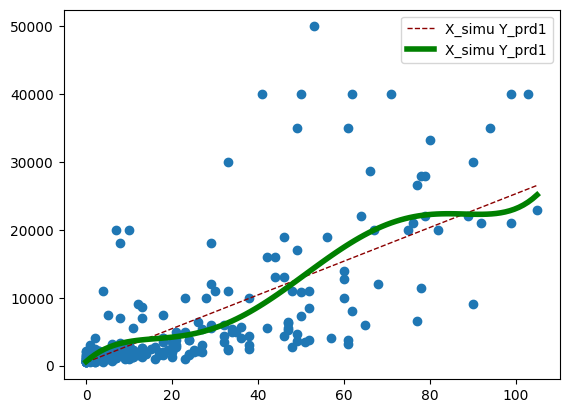

In [ ]:
# 打点（X)の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)
X_simu2 = np.stack([X_simu, X_simu**2, X_simu**3, X_simu**4, X_simu**5], axis=1)

# 線形回帰モデルによる予測値
Y_prd1 = linear_model.predict(X_simu.reshape(-1,1))
# 線形回帰モデルによる予測値
Y_prd2 = linear_model2.predict(X_simu2)

# １次関数：赤い点線、予測値：緑、実際の値：青い散布図
plt.scatter(X, Y)
plt.plot(X_simu, Y_prd1, color='darkred', linewidth=1, linestyle='dashed',label = "X_simu Y_prd1")
plt.plot(X_simu, Y_prd2, color='green', linewidth=4, linestyle='solid',label = "X_simu Y_prd2")
plt.legend()

### モデルの複雑さと過学習

先ほどは5次元の多項式モデルを作成することで、1変数の線形回帰モデルの性能を超えることができました。モデルを複雑にすればパラメータの数も増え、性能が向上するはずです。

試してみましょう。ループ文で次元の範囲を広げながら、モデルの作成と評価を行います。最後に結果のMSEをグラフにしています。MSEは学習データと検証データの2つに対して算出していることに注意してください。

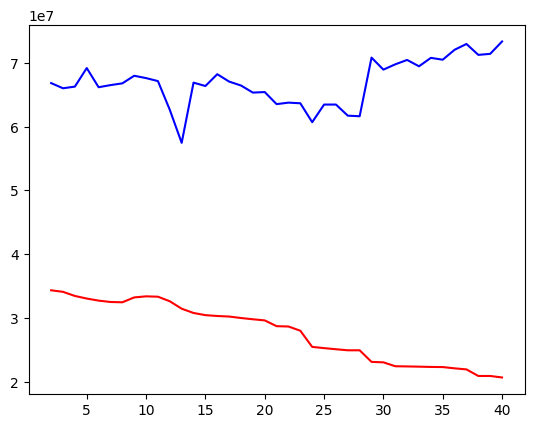

In [24]:
# MSEの結果を入れるリスト
mse_list_train = []
mse_list_valid = []

# 次元の範囲
degree = range(2, 41)

for i in degree:
    # i次元の多項式モデルを作成
    X3 = X.reshape(-1)
    X3 = np.stack([X3**j for j in range(1, i)], axis=1)

    # データセットの分割。X3を使っていることに注意
    X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3, random_state=0)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

    # モデルの作成～予測
    linear_model3 = LinearRegression()
    linear_model3.fit(X_train, Y_train)

    # 学習データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_train)
    mse = mean_squared_error(Y_train, Y_pred)
    mse_list_train.append(mse)

    # 検証データに対する予測とMSEの算出
    Y_pred = linear_model3.predict(X_valid)
    mse = mean_squared_error(Y_valid, Y_pred)
    mse_list_valid.append(mse)

# グラフの描画
plt.plot(degree, mse_list_train, color="red")
plt.plot(degree, mse_list_valid, color="blue")

実行結果は上のようになりました。横軸が次元数、縦軸はMSEの値です。赤線が学習データ、青線が検証データに対するMSEです。

学習データの方は、全体的に 右肩下がり でどこまでもMSEが小さくなっていく傾向が確認できます。それに対して検証データの方は、25次元を過ぎたあたりから逆に、 右肩上がり にMSEが増大してしまっている状況（性能の悪化）を確認できます。

このように、学習データの特徴を過度に学習したために、それ以外のデータ（検証データやテストデータ、一般的なデータ）に対するモデルの性能が悪化した状態を 過学習 と呼びます。過学習となる原因には以下のようなものがあります。

- データに対してモデルが複雑すぎる（パラメータの数が多すぎる）場合
- 学習データに対して、繰り返し学習を行う際の「繰り返しの数（エポック数 と呼びます）」が多すぎる場合
- 相関のある説明変数が複数あり、モデルに過度に影響を及ぼしている場合

モデルの学習の状態は、充分に学習ができていない 未学習 、適当な状態、 過学習 と遷移します。過学習に陥る直前ぐらいが適切な状態です。ここを目指してモデルのチューニングを行っていくこととなります。

### 多重線形回帰モデル

ここまでみてきたように1変数（打点のみ）での予測では限界があるため、打点に加え、年数や打率などを説明変数としたモデルを作成してみましょう。

2つ以上の説明変数を使ったモデルを 多重線形回帰モデル と呼びます（いわゆる 重回帰分析 と呼ばれるものも同じ意味です）。

(数式の説明は理解できないため省略。もし必要なら後でAIに聞いてみる。)

多重線形回帰モデルも、最適なパラメータは勾配降下法で求められます。それでは多重線形回帰モデルを作成してみましょう。

In [25]:
# 目的変数（Y）：推定年俸:salary
# 説明変数（X）：打点:points, 年数:years_exp, 打率:batting, 本塁打:homerun, 球団勝率:team_win
X4 = np.array(dataset[['points', 'years_exp', 'batting', 'homerun', 'team_win']])

# 形状を確認
print("Y=", Y.shape, ", X4=", X4.shape)

Y= (241,) , X4= (241, 5)


In [26]:
# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
general_model = LinearRegression()
general_model.fit(X_train, Y_train)
Y_pred = general_model.predict(X_valid)

# MSEを算出
general_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(多重線形回帰モデル):', general_model_mse)

MSE(多重線形回帰モデル): 59313342.147172146


5次元の多項式モデルのMSE「66191889.04354133」を上回ることができました。説明変数を追加するとさらに良い性能を出せる可能性があります。実際のデータサイエンスの現場では、説明変数同士を四則演算して多数の説明変数を生成し、すべての説明変数の組み合わせのなかでもっとも性能が良い組み合わせを選択する、といった方法も取られます。

### その他の回帰モデル

線形回帰モデルに 正則化 という過学習を防ぐ仕組みを取り入れたものです。正則化には L1正則化 と L2正則化 の2つがあります。

L1正則化：余計な説明変数を削除するようパラメータが調整される
L2正則化：パラメータが大きくなるのを防ぎ過学習を抑制する
Lasso回帰はL1正則化を取り入れたもの、Ridge回帰はL2正則化を取り入れたもので、単なる線形回帰モデルより過学習を起こしにくいと言われています。

In [27]:
# Lasso回帰
from sklearn.linear_model import Lasso

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_valid)

# MSEを算出
lasso_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(Lasso回帰):', lasso_model_mse)

MSE(Lasso回帰): 59325970.958443984


In [28]:
# Ridge回帰
from sklearn.linear_model import Ridge

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの作成～予測
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_valid)

# MSEを算出
ridge_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(Ridge回帰):', ridge_model_mse)

MSE(Ridge回帰): 59881176.931278646


分類モデルで使用されることが多い決定木を回帰に応用したのが回帰木です。決定木の詳細はLesson7で説明します。

In [29]:
# 決定木
from sklearn.tree import DecisionTreeRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_valid)

tree_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(回帰木):', tree_model_mse)

MSE(回帰木): 94784792.15686275


決定木を複数組み合わせたランダムフォレストを回帰に応用したものです。こちらも詳細はLesson7でご説明します。

In [30]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

# データセットの分割。X4を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

randomforest_model = RandomForestRegressor(n_estimators=10, random_state=0)
randomforest_model.fit(X_train, Y_train)
Y_pred = randomforest_model.predict(X_valid)

randomforest_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)

MSE(ランダムフォレスト): 76453938.74509804


## より良いモデルを目指して

最適なモデルと説明変数の組み合わせを見つけるには‥‥モデルごとにすべての説明変数の組み合わせを総当りで比較するという方法がある。

まずはすべての説明変数名の組み合わせのリストを作成。組み合わせを得るには itertools.combinations を使用すると便利。

すべての説明変数名の組み合わせを得たら、MSEを計算する。関数にまとめると以下のようになります。

### モデルと説明変数の選択

In [31]:
# 総当りで最良のMSEを算出する関数
import itertools

def get_best_features(x, y, feature_names, model):
    # すべての説明変数名の組み合わせを入れるリスト　（_を前につけるのは内部使用用途ということらしい）
    _name_list = []

    # 指定された長さの組み合わせを作成する
    for i in range(1, len(feature_names)+1):
        for sublist in itertools.combinations(feature_names, i):
            _name_list.append(list(sublist))

    # 最良のMSEを入れる変数（大きい値を入れておく）
    _best_mse = 999999999999
    _best_mse_name = ''

    # 総当りで比較する
    for _name in _name_list:
        _x = np.array(x[_name])

        _x_train, _x_test, _y_train, _y_test = train_test_split(_x, y, test_size=0.3, random_state=0)
        _x_train, _x_valid, _y_train, _y_valid = train_test_split(_x_train, _y_train, test_size=0.3, random_state=0)

        # モデルの作成～予測
        model.fit(_x_train, _y_train)
        _y_pred = model.predict(_x_valid)

        # MSEを算出
        _mse = mean_squared_error(_y_valid, _y_pred)

        # 最小のmseを保管
        if _mse < _best_mse:
            _best_mse = _mse
            _best_mse_name = _name

    print(model.__class__.__name__, ":", ','.join(_best_mse_name), ": MSE=", _best_mse)

それでは実行してみましょう。モデルはこれまで登場してきたものを使用します。

In [32]:
# 説明変数名のリスト
feature_names = ['points', 'years_exp', 'batting', 'homerun', 'team_win']

# モデルのリストを用意
model_list = []
model_list.append(LinearRegression())
model_list.append(Lasso())
model_list.append(Ridge())
model_list.append(DecisionTreeRegressor())
model_list.append(RandomForestRegressor(n_estimators=100, random_state=0))

for model in model_list:
    get_best_features(dataset, Y, feature_names, model)

LinearRegression : points,years_exp,homerun,team_win : MSE= 59272503.230480626
Lasso : points,years_exp,homerun,team_win : MSE= 59290453.099744506
Ridge : points,years_exp,homerun,team_win : MSE= 59866522.483427495
DecisionTreeRegressor : points,years_exp,batting,homerun : MSE= 69850956.86274509
RandomForestRegressor : years_exp,batting,homerun,team_win : MSE= 75322931.14117648


意外なことに線形回帰モデルのMSEが最小になりました。説明変数は「points,years_exp,homerun,team_win」の組み合わせが最良のようです。今回は単純にすべての説明変数の組み合わせを比較しましたが、より効率よく、説明変数の組み合わせを増やしながら性能が出るものだけを選んでいく 変数増加法 や、逆に説明変数の組み合わせを減らしていく 変数減少法 などもあります。

モデルの設定値を変えて性能向上を目指すことをチューニングと呼びます。ここでは先ほどもっとも性能が悪かったランダムフォレストの性能がどこまで上がるか、パラメータをチューニングして確認してみます。

モデルによって異なりますが、パラメータは複数存在します。scikit-learn の GridSearchCV を使用すると、すべてのパラメータの組み合わせから総当りで最良のものを選択してくれます。

ランダムフォレストのパラメータには n_estimators（木の数） や max_depth（木の深さ） などがあります。これらを指定してみましょう。

In [33]:
from sklearn.model_selection import GridSearchCV

# モデル:ランダムフォレスト
model = RandomForestRegressor(random_state=0)

# パラメータ:n_estimators:木の数、max_depth:木の深さ
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

# グリッドサーチの設定
# cv:交差検証の回数, scoring:目的変数
# 注意:scikit-learnのバージョンが、0.17の場合は、scoring='mean_squared_error' を指定する
gscv = GridSearchCV(model, param_grid=params, cv=3, scoring='neg_mean_squared_error')



学習データには、ランダムフォレストで性能が良かった説明変数の組み合わせを指定します。今回は交差検証なので、機械学習用データを学習データと検証データへ分けずにそのまま指定します。

In [34]:
# ランダムフォレストで性能が良かった説明変数の組み合わせを指定
X5 = np.array(dataset[['years_exp', 'homerun', 'team_win', 'batting']])

# データセットの分割。X5を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X5, Y, test_size=0.3, random_state=0)

他の機械学習のモデルと同様に fit 関数で学習を通じて最適なパラメータの組み合わせを選び出します。

In [39]:
# 学習を実施
gscv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 50],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

MSEは best_score_ で取得できます（マイナスになっていますが同じ意味です）。線形回帰を上回る性能になりました。

In [40]:
# MSE
gscv.best_score_

-53609831.652131505

最適なパラメータの組み合わせは best_params_ で取得できます。

In [41]:
# 最適なパラメータ
gscv.best_params_

{'max_depth': 10, 'n_estimators': 50}

他のモデルでもパラメータのチューニングを行うことで、さらに良い性能が得られる可能性もありますが、いったんここまでとします。


テストデータによる評価
ここまでで、最適な「モデル・説明変数・パラメータ」の組み合わせが得られました。最後にテストデータを用いてモデルの汎化性能を評価しましょう。

In [42]:
# 最適なパラメータによる学習
randomforest_model = RandomForestRegressor(**gscv.best_params_)
randomforest_model.fit(X_train, Y_train)

# テストデータによる評価
Y_pred = randomforest_model.predict(X_test)

randomforest_model_mse = mean_squared_error(Y_test, Y_pred)
print('MSE(ランダムフォレスト):', randomforest_model_mse)

MSE(ランダムフォレスト): 52542624.52760936
